In [1]:
import cartopy.crs as ccrs
import cartopy
import datetime as dt
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import netCDF4
import numpy as np
import os
import imageio
import glob
from datetime import datetime, timedelta

In [2]:
exp_dir = '/glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/strict_QC_CO'

In [3]:

omean_ana = []
omean_bg = []
# t_out = np.empty((15), dtype='datetime64[s]')
t_out = []
num_poss = []
num_used = []

for day in range (1, 28):
    x = datetime(2021, 2, 28)
    delta_day = timedelta(days=+day)
    x = x + delta_day
    startday = x.strftime("%Y-%m-%dT%H:%M:%S")
    y = x + timedelta(days=+1)
    endday = y.strftime("%Y-%m-%dT%H:%M:%S")

    print(startday, endday)

    hofx_file = os.path.join(exp_dir + '/' + 'jedi_letkf_out_obs_depth_'+startday+'Z_0000.nc')
    mydatetime = startday
    window_begin = startday
    window_end = endday
    metric = 'oman' #'ObsValue'
    field = 'snow_depth'
    units = 'm'
    output_path = './figures/'
    plotformat = 'png'

    colmin = -0.6 #None
    colmax = 0.6 #None

    odat = []
    odat2= []
    lons = []
    lats = []
    time = []
    odat3= []
    odat4= []

# Message file being read
#    print(" Reading "+hofx_file)

# Open the file
    fh = netCDF4.Dataset(hofx_file)

   # if metric=='omb':
   #     odat_proc = fh.groups['ObsValue'].variables[field][:] - fh.groups['hofx'].variables[field][:]
   # else:
    odat_proc = fh.groups['ombg'].variables[field][:]
    odat_proc2 = fh.groups['oman'].variables[field][:]
    odat_proc3 = fh.groups['EffectiveQC1'].variables[field][:]
    odat_proc4 = fh.groups['ObsValue'].variables[field][:]

# Read metadata
    lons_proc = fh.groups['MetaData'].variables['longitude'][:]
    lats_proc = fh.groups['MetaData'].variables['latitude'][:]
    time_proc = fh.groups['MetaData'].variables['dateTime'][:]

    for m in range(len(odat_proc)):
        odat.append(odat_proc[m])
        odat2.append(odat_proc2[m])
        odat3.append(odat_proc3[m])
        odat4.append(odat_proc4[m])
        lons.append(lons_proc[m])
        lats.append(lats_proc[m])
        time.append(time_proc[m])

    fh.close()
# Figure filename
# ---------------
    field_savename = field

    savename = os.path.join(output_path, field_savename+"_"+metric+"_"+mydatetime+"."+plotformat)

# Set missing values to nans
    missing = 9.0e+30
    odat = np.where(np.abs(odat) < missing, odat, float("NaN"))
   
    numobs = len(odat)

    obarray = np.empty([numobs, 6])

    obarray[:, 0] = lons
    obarray[:, 1] = lats
    obarray[:, 2] = odat
    obarray[:, 3] = odat2
    obarray[:, 4] = odat3
    obarray[:, 5] = odat4

# Exclude observations north of 50 degrees latitude
    obarray = obarray[obarray[:,1]<41.0]
    obarray = obarray[obarray[:,1]>37.0]
    obarray = obarray[obarray[:,0]<-103.5]
    obarray = obarray[obarray[:,0]>-109.4]
    goodQC = obarray[obarray[:,4]==0]

# Compute and print some stats for the data
# -----------------------------------------
    stdev = np.nanstd(np.abs(goodQC[:, 2]))  # Standard deviation
    omeanb = np.nanmean(np.abs(goodQC[:, 2])) # Mean of the data
    datmi = np.nanmin(goodQC[:, 2])  # Min of the data
    datma = np.nanmax(goodQC[:, 2])  # Max of the data
    omeana = np.nanmean(np.abs(goodQC[:, 3]))

    pmeanb = "{:.2f}".format(omeanb)
    pmeana = "{:.2f}".format(omeana)

    print('omeanb = ',pmeanb, ' omeana = ',pmeana)
    
    omean_bg.append(omeanb)
    omean_ana.append(omeana)
    t_out.append(datetime.fromisoformat(mydatetime))
    num_poss.append(np.size(obarray))
    num_used.append(np.size(goodQC))


2021-03-01T00:00:00 2021-03-02T00:00:00
omeanb =  0.68  omeana =  0.19
2021-03-02T00:00:00 2021-03-03T00:00:00
omeanb =  0.21  omeana =  0.18
2021-03-03T00:00:00 2021-03-04T00:00:00
omeanb =  0.18  omeana =  0.17
2021-03-04T00:00:00 2021-03-05T00:00:00


/glade/u/home/afox/.conda/envs/xr/lib/python3.7/site-packages/ipykernel_launcher.py:74: UserWarning: Warning: converting a masked element to nan.
/glade/u/home/afox/.conda/envs/xr/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in less
<string>:6: UserWarning: Warning: converting a masked element to nan.
/glade/u/home/afox/.conda/envs/xr/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: Warning: converting a masked element to nan.


omeanb =  0.19  omeana =  0.18
2021-03-05T00:00:00 2021-03-06T00:00:00
omeanb =  0.20  omeana =  0.19
2021-03-06T00:00:00 2021-03-07T00:00:00
omeanb =  0.18  omeana =  0.17
2021-03-07T00:00:00 2021-03-08T00:00:00
omeanb =  0.18  omeana =  0.18
2021-03-08T00:00:00 2021-03-09T00:00:00
omeanb =  0.18  omeana =  0.17
2021-03-09T00:00:00 2021-03-10T00:00:00
omeanb =  0.16  omeana =  0.16
2021-03-10T00:00:00 2021-03-11T00:00:00
omeanb =  0.19  omeana =  0.16
2021-03-11T00:00:00 2021-03-12T00:00:00
omeanb =  0.18  omeana =  0.17
2021-03-12T00:00:00 2021-03-13T00:00:00
omeanb =  0.17  omeana =  0.17
2021-03-13T00:00:00 2021-03-14T00:00:00
omeanb =  0.16  omeana =  0.16
2021-03-14T00:00:00 2021-03-15T00:00:00
omeanb =  0.22  omeana =  0.17
2021-03-15T00:00:00 2021-03-16T00:00:00
omeanb =  0.21  omeana =  0.17
2021-03-16T00:00:00 2021-03-17T00:00:00
omeanb =  0.18  omeana =  0.17
2021-03-17T00:00:00 2021-03-18T00:00:00
omeanb =  0.21  omeana =  0.19
2021-03-18T00:00:00 2021-03-19T00:00:00
omeanb

In [7]:
np.size(goodQC)/np.size(obarray)

0.3708609271523179

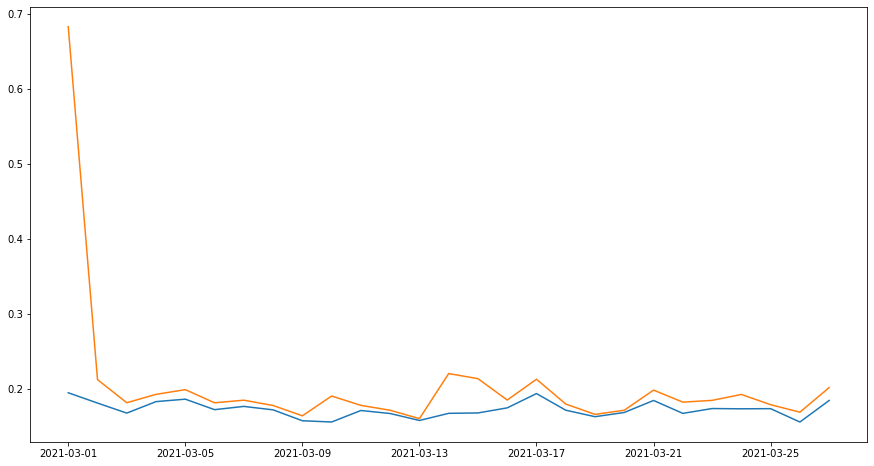

In [4]:
# Create figure
# -------------
fig = plt.figure(figsize=(15, 8))

plt.plot(t_out, omean_ana)
plt.plot(t_out, omean_bg)

In [ ]:

# Create figure
# -------------
    fig = plt.figure(figsize=(15, 8))

# initialize the plot pointing to the projection
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

# plot grid lines
    gl = ax.gridlines(crs=ccrs.PlateCarree(central_longitude=0), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.5, linestyle='-')

    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}
#gl.xlocator = mticker.FixedLocator(
#    [-180, -135, -90, -45, 0, 45, 90, 135, 179.9])
    ax.set_ylabel("Latitude",  fontsize=7)
    ax.set_xlabel("Longitude", fontsize=7)

    ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)

# scatter data
    sc = ax.scatter(obarray[:, 1], obarray[:, 2],
                c=obarray[:, 0], s=50, linewidth=0.4, edgecolors='black',
                transform=ccrs.PlateCarree(), cmap=cmap_obs, vmin=cmin, vmax=cmax)   
# colorbar
    cbar = plt.colorbar(sc, ax=ax, orientation="horizontal", pad=.1, fraction=0.06,)
    if not units==None:
        cbar.ax.set_ylabel(units, fontsize=10)

# draw coastlines
    ax.coastlines()
    ax.add_feature(cartopy.feature.STATES)

    ax.set_extent([-110, -104, 36.8, 41.2], crs=ccrs.PlateCarree())

# figure labels
    plt.title("Observation statistics: "+field.replace("_"," ")+" "+metric+" | mean = "+pmean+" | "+
            window_begin+" to "+window_end, y=1.08)
    ax.text(0.45, -0.1,   'Longitude', transform=ax.transAxes, ha='left')
    ax.text(-0.08, 0.4, 'Latitude', transform=ax.transAxes,
        rotation='vertical', va='bottom')
  

#    show plot
    savename = ('./pngs/Colorado_Bkg_and_OmB_'+datetime+'_cycle.png')
    print(" Saving figure as", savename, "\n")
    plt.savefig(savename, facecolor='w', dpi = 400)

In [ ]:
png_dir = './pngs'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('_cycle.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('./cycle_movie.gif', images, fps = 1)

In [ ]:

x = datetime(2018, 6, 1)

i = 3897

print(x)

new_day = timedelta(days=+i)

x = x + new_day

print(x)
date_str = x.strftime("%Y-%m-%dT%H:%M:%S")

print(date_str)